In [1]:
from os import listdir
from os.path import isfile, join
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
import codecs

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt('cross.txt'))

In [3]:
Es = np.concatenate((data[0],data[2],data[4],data[6],data[8]))
Cs = np.concatenate((data[1],data[3],data[5],data[7],data[9]))

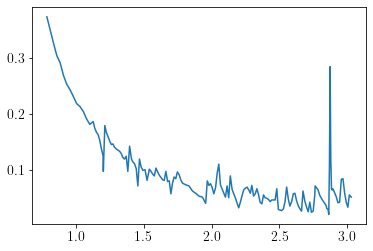

In [4]:
plt.plot(Es[:-1],Cs[:-1])

In [5]:
np.savetxt('EvsCross.txt', np.transpose([Es[:-1]*1000,Cs[:-1]]))

In [6]:
c = 2.99792e8 # i m/s
hbar = 6.5821e-19 # i keV*s
a = 1/137.036
hbarc = 1.97327e-10

def cross(Ta,v):
    return (1*13*a*hbarc/(4*Ta*np.sin(v*(2*np.pi)/360/2)**2))**2*1e4

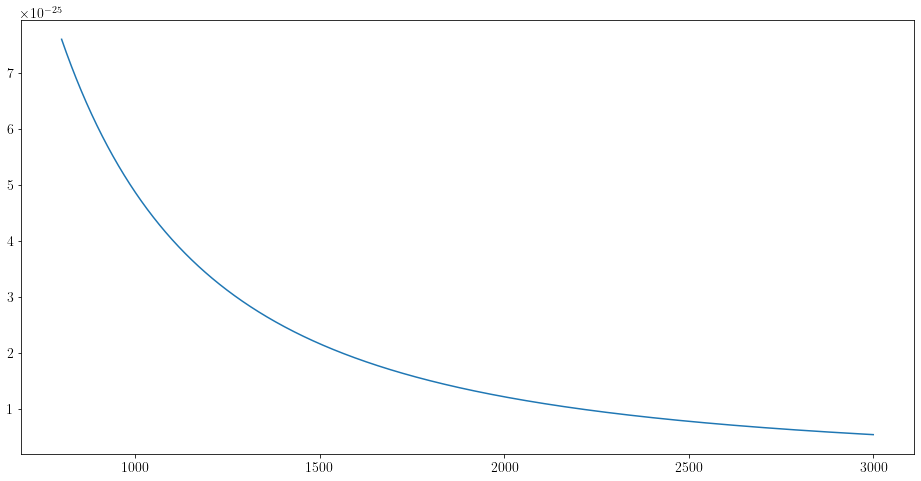

In [7]:
Ts = np.linspace(800,3000,2000)
plt.figure(figsize = (16,8))
plt.plot(Ts,cross(Ts,110))

In [8]:
data = np.transpose(np.loadtxt('rates.txt', skiprows=1))
counts = data[0]
solid = data[1]
energy = data[3]
times = data[4]/1000 #divider med 1000 for at få tid i s
currents = data[5]/times

In [9]:
currents

array([28.17349384, 98.21775234, 80.46442088])

In [10]:
#for #1 blev der angiveligt kørt ved ca. 0,5 nA, svarer til ca 3.12e9 protoner per sekund. Det ville derfor give
#mening hvis currents skal ganges med 10^8

In [11]:
currents = currents*1e8

In [12]:
dnts = []
for i in range(len(counts)):
    dnt = counts[i]/times[i] * 1/currents[i]*1/(cross(energy[i],110)*solid[i])
    dnts.append(dnt)
dnts = np.array(dnts)
mold = dnts/6.022e23 #mol pr cm²
gd = 27*mold #g pr cm²

In [13]:
gd

array([8.57423808e-06, 1.02588740e-05, 1.34435174e-05])

In [14]:
#for at få tykkelse, divider med densiteten af alu

In [15]:
gd/(2.7)/100*1e9

array([31.75643733, 37.99582969, 49.79080504])